In [61]:
import tensorflow as tf
# import tensorflow_decision_forests as tfdf
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

### House pricing prediction

In [39]:
train_file_path = "data_HP/train.csv"
dataset_df = pd.read_csv(train_file_path)
dataset_df.shape

dataset_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [40]:
dataset_df = dataset_df.drop('Id',axis=1)

In [41]:
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [42]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


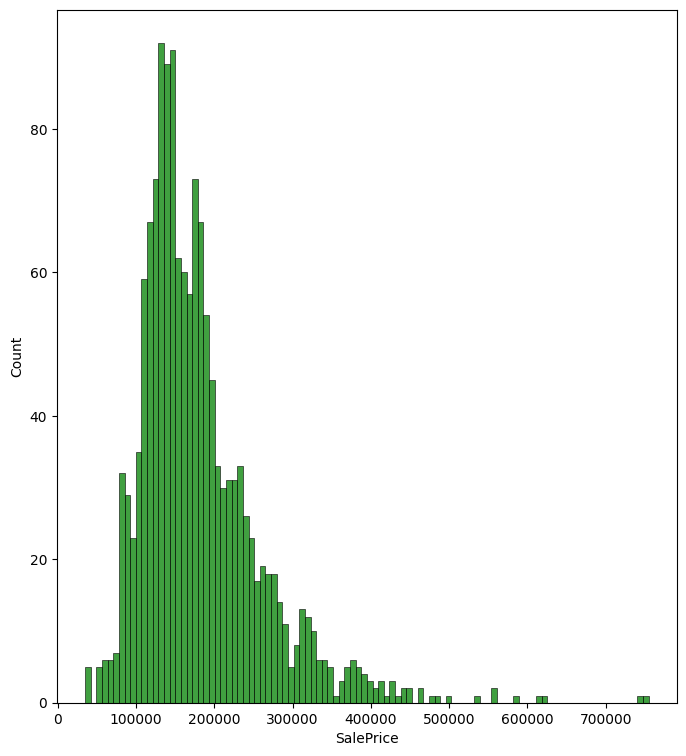

In [43]:
print(dataset_df["SalePrice"].describe())
plt.figure(figsize=(8,9))
sns.histplot(dataset_df["SalePrice"],color="g",bins=100);

In [44]:
list(set(dataset_df.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [45]:
df_num = dataset_df.select_dtypes(include=['float64','int64'])
df_num.shape
df_num.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

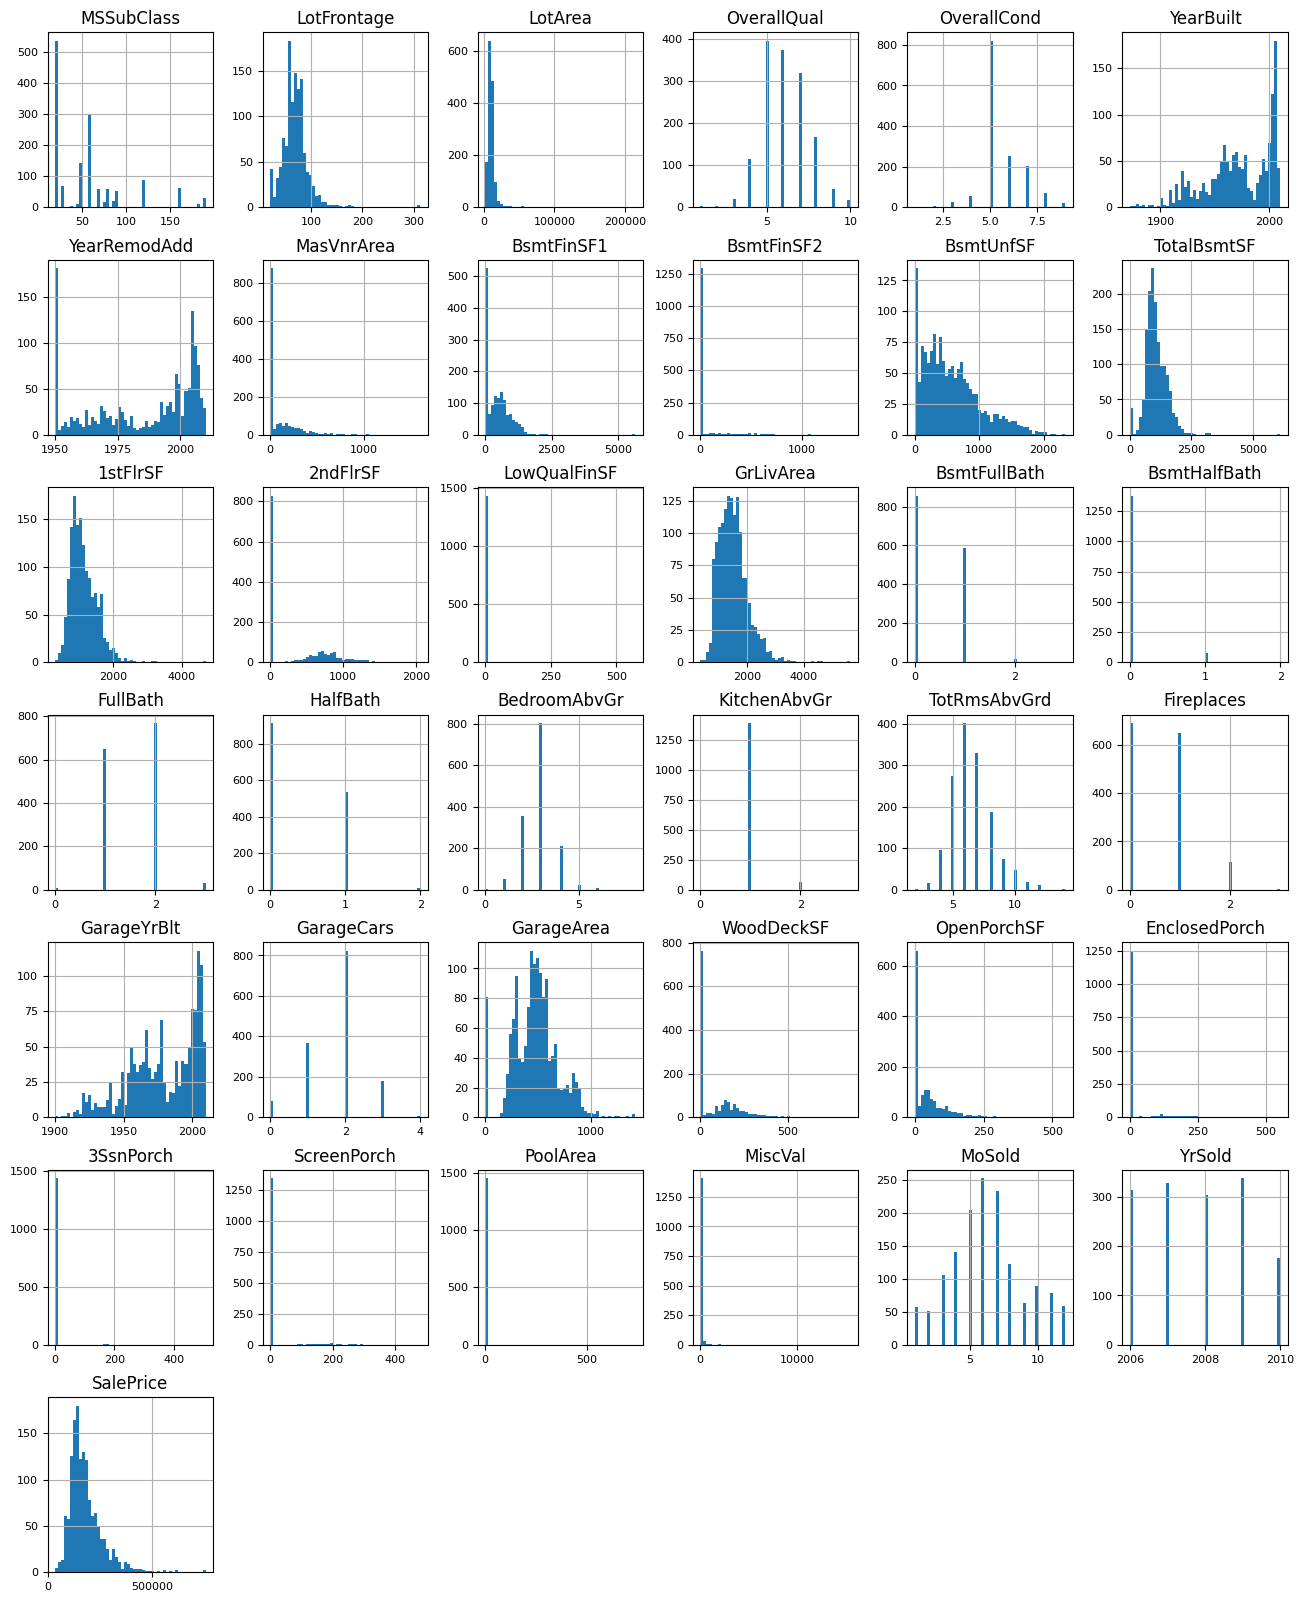

In [46]:
df_num.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)

In [52]:
import pandas as pd
from sklearn.impute import SimpleImputer

# 1. Ensure we're working with a DataFrame copy to avoid SettingWithCopyWarning
dataset_df = dataset_df.copy()

# 2. Properly select categorical columns (object type)
df_cat = dataset_df.select_dtypes(include=["object"])

# 3. Select numeric columns (exclude object type)
df_num = dataset_df.select_dtypes(exclude=["object"])


# 4. Handle numeric imputation

numeric_imputer = SimpleImputer(strategy="median")
dataset_df[df_num.columns] = numeric_imputer.fit_transform(dataset_df[df_num.columns])

# 5. Handle categorical imputation carefully

    # Convert all categorical columns to string type first
dataset_df[df_cat.columns] = dataset_df[df_cat.columns].astype(str)
    
categorical_imputer = SimpleImputer(strategy="most_frequent")
dataset_df[df_cat.columns] = categorical_imputer.fit_transform(dataset_df[df_cat.columns])

# 6. One-hot encoding
if not df_cat.empty:
    dataset_df = pd.get_dummies(dataset_df, columns=df_cat.columns, drop_first=False)

# 7. Final check
print("Processed DataFrame shape:", dataset_df.shape)
print("Columns after processing:", dataset_df.columns.tolist())

Processed DataFrame shape: (1460, 304)
Columns after processing: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave', 'Alley_nan', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Insi

Now what we got to do is to transform the data from ```(pd.DataFrame)``` to  ```(tf.data.Dataset)```


By default the Random Forest Model is configured to train classification tasks. Since this is a regression problem, we will specify the type of the task (tfdf.keras.Task.REGRESSION) as a parameter here

In [59]:
X = dataset_df.drop(columns=['SalePrice'])
y = dataset_df['SalePrice']
print(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

regressor = RandomForestRegressor(n_estimators=100,random_state=42)
regressor.fit(X_train,y_train)

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64


RandomForestRegressor(random_state=42)

In [62]:
predictions = regressor.predict(X_test)
print("R2 Score:", r2_score(y_test, predictions))

R2 Score: 0.892114924105522


        Feature  Importance
3   OverallQual    0.557723
15    GrLivArea    0.122088
11  TotalBsmtSF    0.034640
13     2ndFlrSF    0.033991
8    BsmtFinSF1    0.028621
12     1stFlrSF    0.025892
2       LotArea    0.016462
26   GarageArea    0.015450
5     YearBuilt    0.012115
25   GarageCars    0.011927


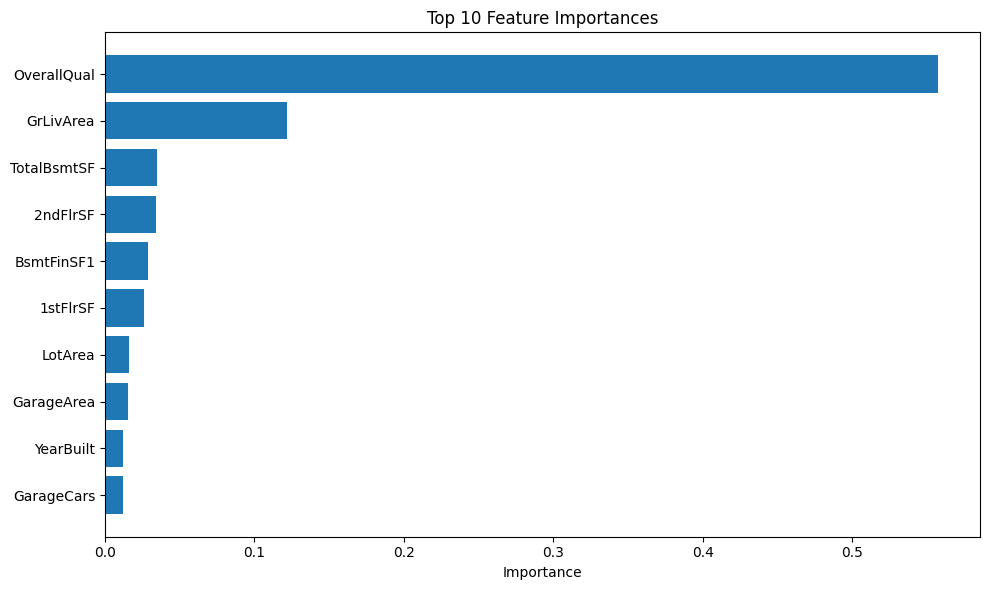

In [63]:
importances = regressor.feature_importances_

# Get feature names (make sure this matches your final training data's column names after encoding)
feature_names = X_train.columns

# Create a DataFrame for easier viewing
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance descending
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print top 10 features
print(feature_importances.head(10))

# Optional: Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10][::-1], feature_importances['Importance'][:10][::-1])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()